In [36]:
import numpy as np
import pandas as pd
from nltk.stem import WordNetLemmatizer 
import nltk
import matplotlib.pyplot as plt

dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [37]:
pos_reviews = []
neg_reviews = []

for i in range(dataset.shape[0]):
    if dataset["Liked"][i] == 1:
        pos_reviews.append(dataset["Review"][i].lower())
    else:
        neg_reviews.append(dataset["Review"][i].lower())
        
pos_reviews

['wow... loved this place.',
 'stopped by during the late may bank holiday off rick steve recommendation and loved it.',
 'the selection on the menu was great and so were the prices.',
 'the fries were great too.',
 'a great touch.',
 'service was very prompt.',
 'i tried the cape cod ravoli, chicken, with cranberry...mmmm!',
 'highly recommended.',
 'the food, amazing.',
 'service is also cute.',
 'i could care less... the interior is just beautiful.',
 'so they performed.',
 "that's right....the red velvet cake.....ohhh this stuff is so good.",
 'this hole in the wall has great mexican street tacos, and friendly staff.',
 'also there are combos like a burger, fries, and beer for 23 which is a decent deal.',
 'i found this place by accident and i could not be happier.',
 'overall, i like this place a lot.',
 'the only redeeming quality of the restaurant was that it was very inexpensive.',
 'ample portions and good prices.',
 'my first visit to hiro was a delight!',
 'the shrimp tender

In [38]:
neg_reviews

['crust is not good.',
 'not tasty and the texture was just nasty.',
 'now i am getting angry and i want my damn pho.',
 "honeslty it didn't taste that fresh.)",
 'the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
 'would not go back.',
 'the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced.',
 'i was disgusted because i was pretty sure that was human hair.',
 'i was shocked because no signs indicate cash only.',
 'waitress was a little slow in service.',
 'this place is not worth your time, let alone vegas.',
 'did not like at all.',
 'the burrittos blah!',
 '- they never brought a salad we asked for.',
 'took an hour to get our food only 4 tables in restaurant my food was luke warm, our sever was running around like he was totally overwhelmed.',
 'the worst was the salmon sashimi.',
 'this was like the final blow!',
 'seems like a good quick place to grab a bite of some famil

In [39]:
def remove_punctuation(reviews):
    punctuation = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\''

    words = []
    
    for i in range(len(reviews)):
        for char in punctuation:
            reviews[i] = reviews[i].replace(char, ' ')
        words.append(reviews[i].split())

    return words

In [40]:
def remove_stopwords(review_words):
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.remove('not')
    
    for review in review_words:
        for word in stopwords:
            while word in review:
                review.remove(word)
    
    return review_words

In [41]:
def lemmatize_words(review_words):
    wn = WordNetLemmatizer()
    
    new_reviews = []
    lemmatized_words = []
    
    for review in review_words:
        for word in review:
            lemmatized_words.append(wn.lemmatize(word))
            
        new_reviews.append(lemmatized_words)
        lemmatized_words = []
        
    return new_reviews

In [42]:
def process_reviews(reviews):
    reviews_split = remove_punctuation(reviews)
    
    remove_stopwords(reviews_split)
    
    final_reviews = lemmatize_words(reviews_split)
    
    return final_reviews


In [43]:
pos_reviews_processed = process_reviews(pos_reviews)
neg_reviews_processed = process_reviews(neg_reviews)

pos_reviews_processed

[['wow', 'loved', 'place'],
 ['stopped',
  'late',
  'may',
  'bank',
  'holiday',
  'rick',
  'steve',
  'recommendation',
  'loved'],
 ['selection', 'menu', 'great', 'price'],
 ['fry', 'great'],
 ['great', 'touch'],
 ['service', 'prompt'],
 ['tried', 'cape', 'cod', 'ravoli', 'chicken', 'cranberry', 'mmmm'],
 ['highly', 'recommended'],
 ['food', 'amazing'],
 ['service', 'also', 'cute'],
 ['could', 'care', 'le', 'interior', 'beautiful'],
 ['performed'],
 ['right', 'red', 'velvet', 'cake', 'ohhh', 'stuff', 'good'],
 ['hole', 'wall', 'great', 'mexican', 'street', 'taco', 'friendly', 'staff'],
 ['also', 'combo', 'like', 'burger', 'fry', 'beer', '23', 'decent', 'deal'],
 ['found', 'place', 'accident', 'could', 'not', 'happier'],
 ['overall', 'like', 'place', 'lot'],
 ['redeeming', 'quality', 'restaurant', 'inexpensive'],
 ['ample', 'portion', 'good', 'price'],
 ['first', 'visit', 'hiro', 'delight'],
 ['shrimp', 'tender', 'moist'],
 ['positive', 'note', 'server', 'attentive', 'provided', 'g

In [44]:
neg_reviews_processed

[['crust', 'not', 'good'],
 ['not', 'tasty', 'texture', 'nasty'],
 ['getting', 'angry', 'want', 'damn', 'pho'],
 ['honeslty', 'taste', 'fresh'],
 ['potato',
  'like',
  'rubber',
  'could',
  'tell',
  'made',
  'ahead',
  'time',
  'kept',
  'warmer'],
 ['would', 'not', 'go', 'back'],
 ['cashier', 'care', 'ever', 'say', 'still', 'ended', 'wayyy', 'overpriced'],
 ['disgusted', 'pretty', 'sure', 'human', 'hair'],
 ['shocked', 'sign', 'indicate', 'cash'],
 ['waitress', 'little', 'slow', 'service'],
 ['place', 'not', 'worth', 'time', 'let', 'alone', 'vega'],
 ['not', 'like'],
 ['burrittos', 'blah'],
 ['never', 'brought', 'salad', 'asked'],
 ['took',
  'hour',
  'get',
  'food',
  '4',
  'table',
  'restaurant',
  'food',
  'luke',
  'warm',
  'sever',
  'running',
  'around',
  'like',
  'totally',
  'overwhelmed'],
 ['worst', 'salmon', 'sashimi'],
 ['like', 'final', 'blow'],
 ['seems',
  'like',
  'good',
  'quick',
  'place',
  'grab',
  'bite',
  'familiar',
  'pub',
  'food',
  'favor

In [83]:
def get_words(reviews):
    words = []
    
    for review in reviews:
        for word in review:
            if word.isnumeric() == False:
                words.append(word)
            
    return words

In [84]:
pos_words = get_words(pos_reviews_processed)
neg_words = get_words(neg_reviews_processed)

pos_words

['wow',
 'loved',
 'place',
 'stopped',
 'late',
 'may',
 'bank',
 'holiday',
 'rick',
 'steve',
 'recommendation',
 'loved',
 'selection',
 'menu',
 'great',
 'price',
 'fry',
 'great',
 'great',
 'touch',
 'service',
 'prompt',
 'tried',
 'cape',
 'cod',
 'ravoli',
 'chicken',
 'cranberry',
 'mmmm',
 'highly',
 'recommended',
 'food',
 'amazing',
 'service',
 'also',
 'cute',
 'could',
 'care',
 'le',
 'interior',
 'beautiful',
 'performed',
 'right',
 'red',
 'velvet',
 'cake',
 'ohhh',
 'stuff',
 'good',
 'hole',
 'wall',
 'great',
 'mexican',
 'street',
 'taco',
 'friendly',
 'staff',
 'also',
 'combo',
 'like',
 'burger',
 'fry',
 'beer',
 'decent',
 'deal',
 'found',
 'place',
 'accident',
 'could',
 'not',
 'happier',
 'overall',
 'like',
 'place',
 'lot',
 'redeeming',
 'quality',
 'restaurant',
 'inexpensive',
 'ample',
 'portion',
 'good',
 'price',
 'first',
 'visit',
 'hiro',
 'delight',
 'shrimp',
 'tender',
 'moist',
 'positive',
 'note',
 'server',
 'attentive',
 'provi

In [85]:
neg_words

['crust',
 'not',
 'good',
 'not',
 'tasty',
 'texture',
 'nasty',
 'getting',
 'angry',
 'want',
 'damn',
 'pho',
 'honeslty',
 'taste',
 'fresh',
 'potato',
 'like',
 'rubber',
 'could',
 'tell',
 'made',
 'ahead',
 'time',
 'kept',
 'warmer',
 'would',
 'not',
 'go',
 'back',
 'cashier',
 'care',
 'ever',
 'say',
 'still',
 'ended',
 'wayyy',
 'overpriced',
 'disgusted',
 'pretty',
 'sure',
 'human',
 'hair',
 'shocked',
 'sign',
 'indicate',
 'cash',
 'waitress',
 'little',
 'slow',
 'service',
 'place',
 'not',
 'worth',
 'time',
 'let',
 'alone',
 'vega',
 'not',
 'like',
 'burrittos',
 'blah',
 'never',
 'brought',
 'salad',
 'asked',
 'took',
 'hour',
 'get',
 'food',
 'table',
 'restaurant',
 'food',
 'luke',
 'warm',
 'sever',
 'running',
 'around',
 'like',
 'totally',
 'overwhelmed',
 'worst',
 'salmon',
 'sashimi',
 'like',
 'final',
 'blow',
 'seems',
 'like',
 'good',
 'quick',
 'place',
 'grab',
 'bite',
 'familiar',
 'pub',
 'food',
 'favor',
 'look',
 'elsewhere',
 'p

In [86]:
def plot_freq(freq):
    plt.subplots(figsize=(20,12))
    freq.plot(50)

Number of Positive words =  2704


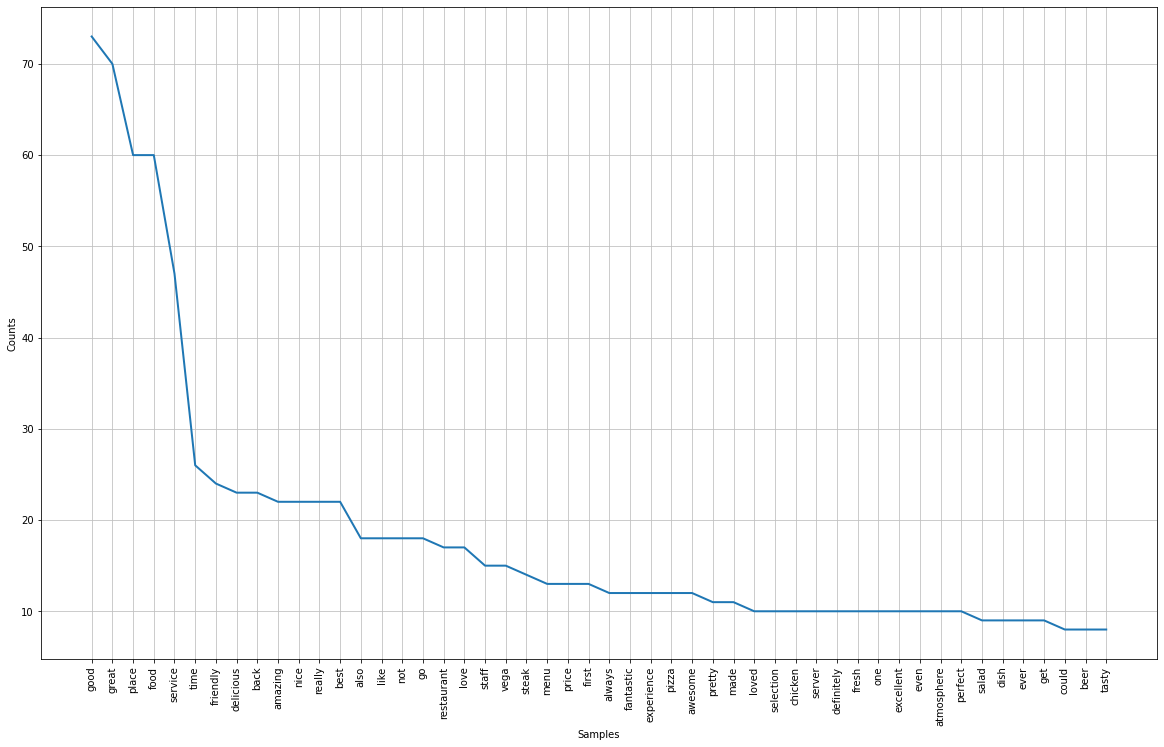

Number of Negative words =  2895


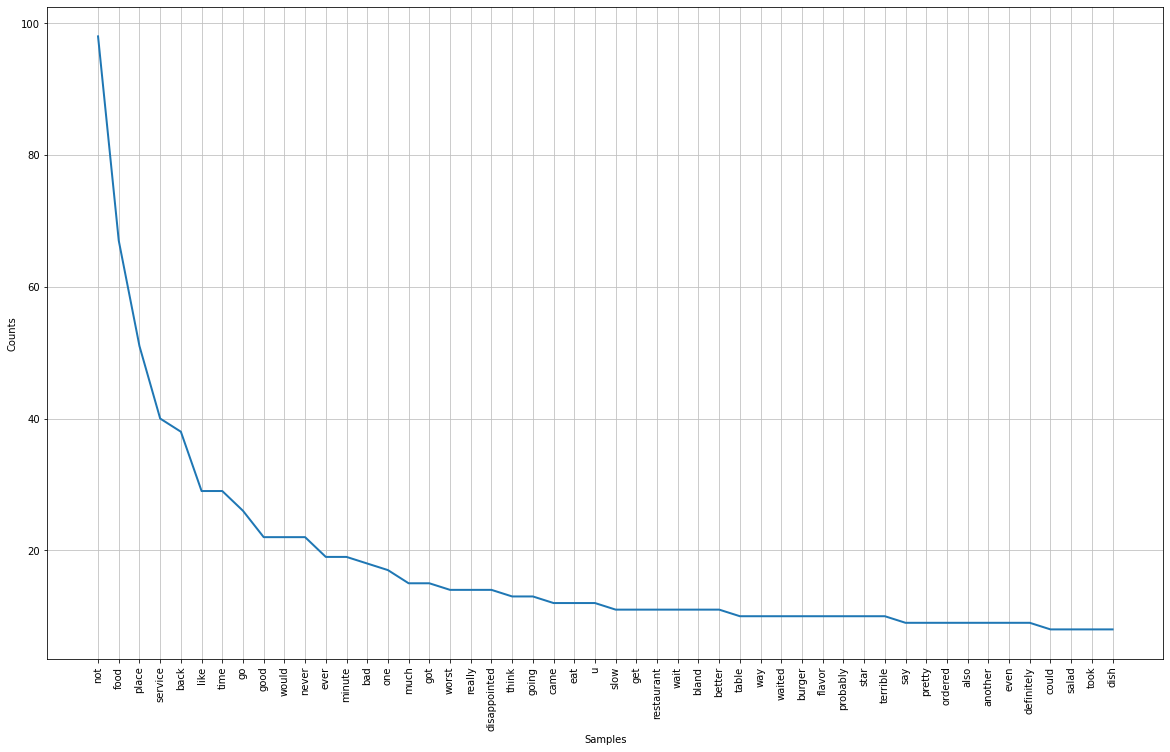

In [87]:
pos_freq = nltk.FreqDist(pos_words)   
neg_freq = nltk.FreqDist(neg_words)

print("Number of Positive words = ", len(pos_words))

plot_freq(pos_freq)

print("Number of Negative words = ", len(neg_words))

plot_freq(neg_freq)

Number of Positive words =  1531


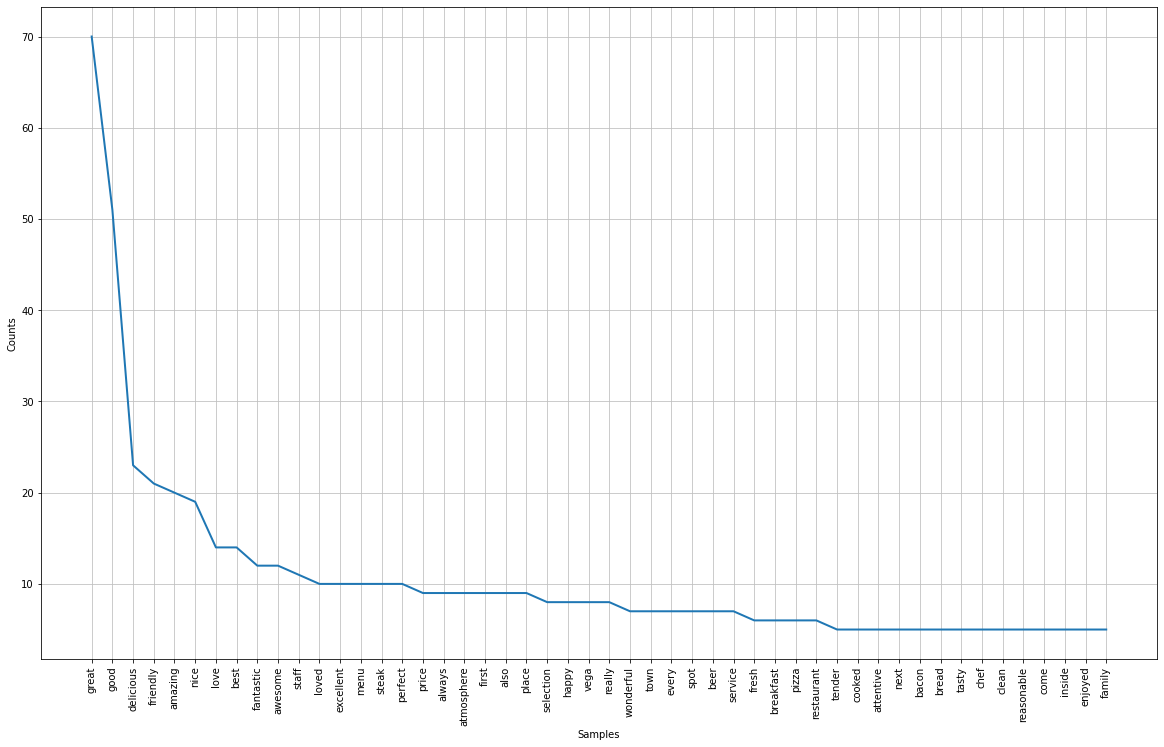

Number of Negative words =  1715


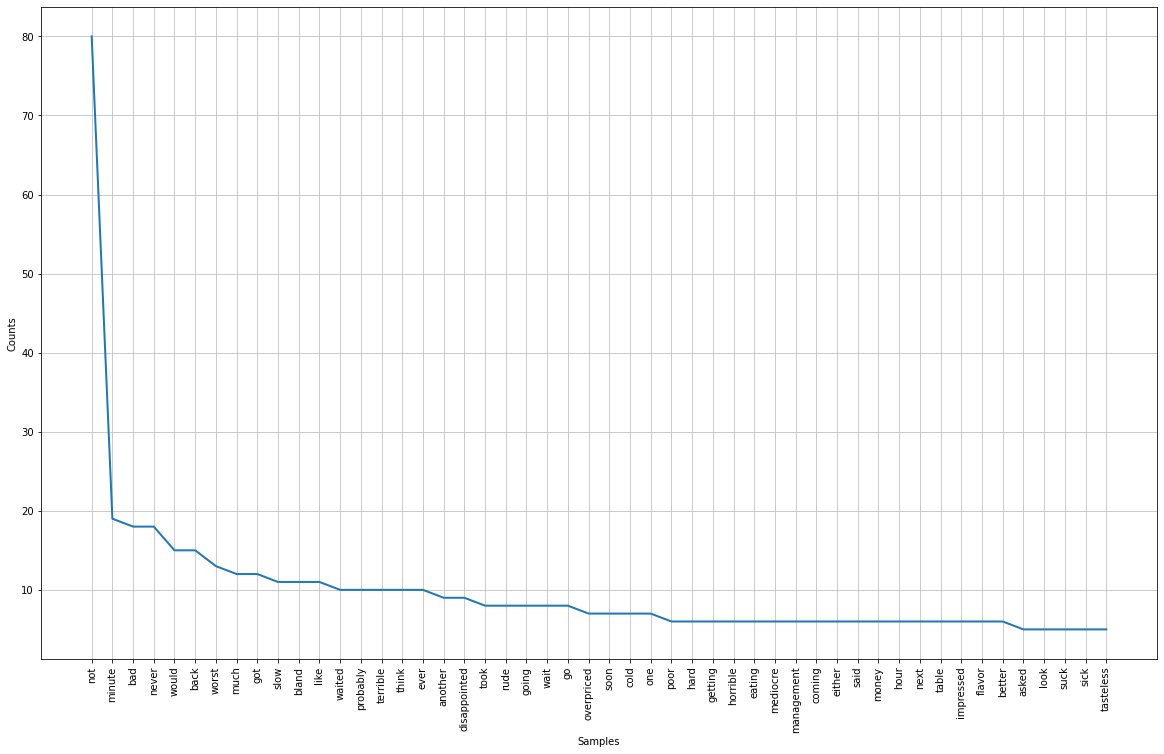

In [88]:
for word in pos_words:
    if word in neg_words:
        if pos_freq[word] >= neg_freq[word]:
            while word in neg_words:
                neg_words.remove(word)
                pos_words.remove(word)
        else:
            while word in pos_words:
                pos_words.remove(word)
                neg_words.remove(word)

                
while 'food' in neg_words:
    neg_words.remove('food')

pos_freq = nltk.FreqDist(pos_words)   
neg_freq = nltk.FreqDist(neg_words)

print("Number of Positive words = ", len(pos_words))

plot_freq(pos_freq)

print("Number of Negative words = ", len(neg_words))

plot_freq(neg_freq)

In [119]:
def assign_points(freq, mid_freq):
    temp = freq
    for word in temp:
        temp[word] = round((temp[word]/mid_freq) * 10)/2
        if temp[word] == 0:
            temp[word] = 0.5
        elif temp[word] > 5:
            temp[word] = 5.0
    return temp

Positive Points: 


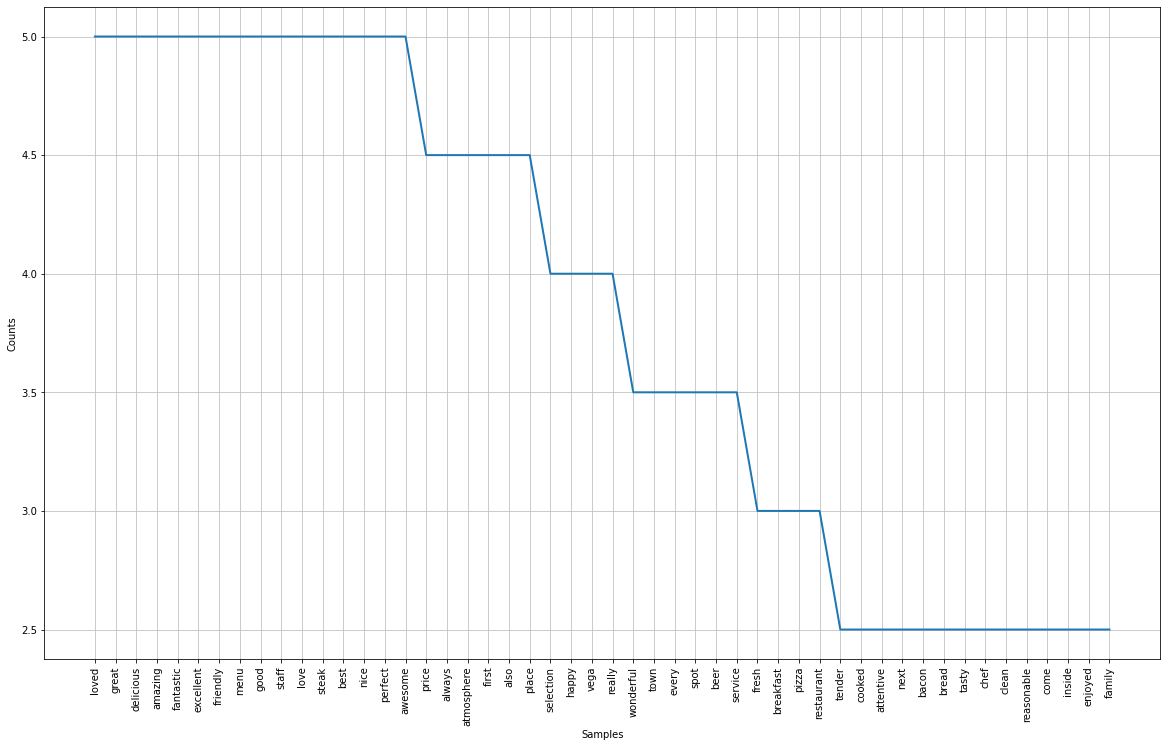

Negative Points: 


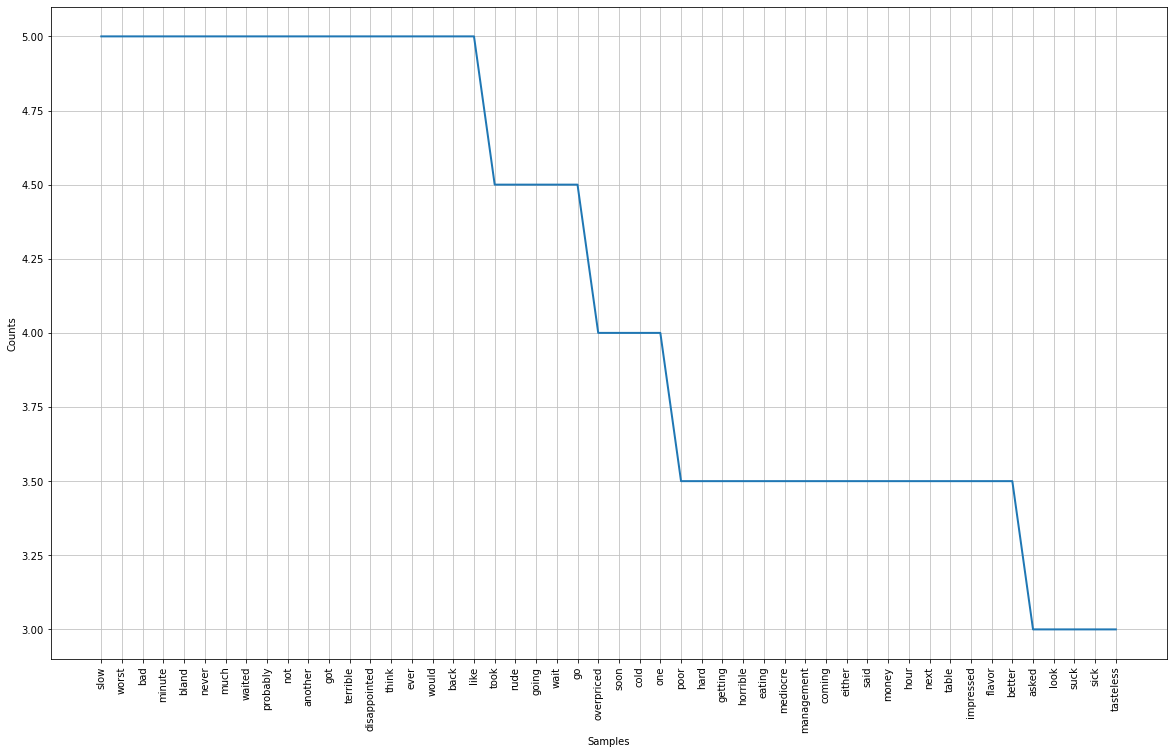

In [120]:
pos_points = assign_points(pos_freq, pos_freq['excellent'])

neg_points = assign_points(neg_freq, neg_freq['disappointed'])

print("Positive Points: ")
plot_freq(pos_points)

print("Negative Points: ")
plot_freq(neg_points)

In [121]:
def get_score(inp_words) :
    total = 0
    i=0

    multiplier = 1

    for word in inp_words:
        if word == "not":
            multiplier = -1
            continue

        if pos_points[word] != 0:
            total += pos_points[word] * multiplier

            if multiplier == -1:
                print("not", word, "->", pos_points[word] * multiplier)
            else:
                print(word, "->", pos_points[word])

            i+=1

        if neg_points[word] != 0:
            total -= neg_points[word] * multiplier

            if multiplier == -1:
                print("not", word, "->", -neg_points[word] * multiplier)
            else:
                print(word, "->", -neg_points[word])

            i+=1

        multiplier = 1

    if i == 0:
        score = 0
    else:
        score = total/i

    print("\nScore =" ,score)
    if(total >= 0):
        print("Liked\n")
    else:
        print("Did Not Like\n")
        
    print("-----------------------\n")
    
    return score

In [122]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = []

for review in dataset.iloc[:, 0]:
    
    inp = [review]
    
    inp_processed = process_reviews(inp)
    inp_words = get_words(inp_processed)

    score = get_score(inp_words)
    
    if score >= 0:
        pred.append(1)
    else:
        pred.append(0)

place -> 4.5

Score = 4.5
Liked

-----------------------

not good -> -5.0

Score = -5.0
Did Not Like

-----------------------

tasty -> 2.5
texture -> -0.5
nasty -> -1.5

Score = 0.16666666666666666
Liked

-----------------------

bank -> 0.5
holiday -> 0.5
recommendation -> 1.5
loved -> 5.0

Score = 1.875
Liked

-----------------------

selection -> 4.0
menu -> 5.0
great -> 5.0
price -> 4.5

Score = 4.625
Liked

-----------------------

getting -> -3.5
angry -> -0.5
damn -> -1.0

Score = -1.6666666666666667
Did Not Like

-----------------------

taste -> 0.5
fresh -> 3.0

Score = 1.75
Liked

-----------------------

potato -> 1.5
like -> -5.0
rubber -> -0.5
made -> 2.5
ahead -> -0.5
time -> -1.5
kept -> -1.5
warmer -> -0.5

Score = -0.6875
Did Not Like

-----------------------

fry -> 0.5
great -> 5.0

Score = 2.75
Liked

-----------------------

great -> 5.0
touch -> 1.0

Score = 3.0
Liked

-----------------------

prompt -> 0.5

Score = 0.5
Liked

-----------------------

not go ->

second -> 1.5
time -> -1.5
lunch -> -1.0
buffet -> 2.0
pretty -> 1.0
good -> 5.0

Score = 1.1666666666666667
Liked

-----------------------

much -> -5.0
good -> 5.0
feel -> -0.5
cheated -> -0.5
wasting -> -1.0
eating -> -3.5
going -> -4.5

Score = -1.4285714285714286
Did Not Like

-----------------------

like -> -5.0
experiencing -> -0.5
underwhelming -> -1.0
relationship -> -0.5
party -> 1.0
wait -> -4.5
break -> -1.5

Score = -1.7142857142857142
Did Not Like

-----------------------

walked -> -0.5
place -> 4.5
smelled -> -0.5
like -> -5.0
old -> -1.5
grease -> -1.0
trap -> -0.5
others -> -1.0
eating -> -3.5

Score = -1.0
Did Not Like

-----------------------

turkey -> -0.5
beef -> 1.5
beef -> -1.0
bland -> -5.0

Score = -1.25
Did Not Like

-----------------------

place -> 4.5

Score = 4.5
Liked

-----------------------

pan -> -0.5
raving -> -0.5
taste -> 0.5
like -> -5.0
sugary -> -1.0
disaster -> -0.5
tailored -> -0.5
palate -> -0.5
six -> -1.0
year -> 0.5
old -> -1.5

Score =

decor -> 1.5

Score = 1.5
Liked

-----------------------

really -> 4.0
like -> -5.0
crepe -> 0.5

Score = -0.16666666666666666
Did Not Like

-----------------------

served -> -1.0
hot -> -0.5
bread -> 2.5
butter -> 1.5
home -> -0.5
made -> 2.5
potato -> 1.5
chip -> -1.0
bacon -> 2.5
bit -> -3.0
top -> 0.5
original -> 0.5
good -> 5.0

Score = 0.8076923076923077
Liked

-----------------------

watch -> 1.0
delicious -> 5.0

Score = 3.0
Liked

-----------------------

egg -> 0.5
roll -> 1.0
fantastic -> 5.0

Score = 2.1666666666666665
Liked

-----------------------

order -> 0.5
arrived -> 0.5
arrived -> -1.0
one -> -4.0
gyro -> -0.5
missing -> -0.5

Score = -0.8333333333333334
Did Not Like

-----------------------

salad -> 0.5
ice -> 1.5
cream -> 1.0
dessert -> 2.0
feeling -> 1.0
quite -> 2.0
satisfied -> 0.5

Score = 1.2142857142857142
Liked

-----------------------

not really -> -4.0
sure -> -2.0
voted -> -0.5
best -> 5.0
hot -> -0.5
dog -> -0.5
reader -> -0.5

Score = -0.428571428

know -> -3.0
pulled -> -0.5
pork -> 1.0
soooo -> 1.0
delicious -> 5.0

Score = 0.7
Liked

-----------------------

get -> -1.0
incredibly -> 0.5
fresh -> 3.0
fish -> -0.5
prepared -> 0.5
care -> 0.5

Score = 0.5
Liked

-----------------------

go -> -4.5
gave -> -1.0
star -> -1.0
rating -> -0.5
please -> -1.5
know -> -3.0
third -> -1.0
time -> -1.5
eating -> -3.5
burger -> -2.0
writing -> -0.5
review -> -1.0

Score = -1.75
Did Not Like

-----------------------

love -> 5.0
fact -> 1.0
everything -> 2.0
menu -> 5.0

Score = 3.25
Liked

-----------------------

place -> 4.5

Score = 4.5
Liked

-----------------------

excellent -> 5.0
service -> 3.5
good -> 5.0

Score = 4.5
Liked

-----------------------

beer -> 3.5
drink -> 1.0
selection -> 4.0
good -> 5.0
selection -> 4.0

Score = 3.5
Liked

-----------------------

stay -> -0.5
away -> 0.5
shrimp -> -1.0
fried -> -1.5
noodle -> -0.5

Score = -0.6
Did Not Like

-----------------------

potato -> 1.5
chip -> -1.0
order -> 0.5
sad -> -2

one -> -4.0
simply -> -1.0
disappointment -> -2.0

Score = -2.3333333333333335
Did Not Like

-----------------------

disappointed -> -5.0
quality -> -1.0

Score = -3.0
Did Not Like

-----------------------

accountant -> -0.5
know -> -3.0
getting -> -3.5
screwed -> -0.5

Score = -1.875
Did Not Like

-----------------------

place -> 4.5
eat -> -3.0
reminds -> 0.5
mom -> 0.5
shop -> 0.5
shop -> -0.5

Score = 0.4166666666666667
Liked

-----------------------

first -> 4.5
taste -> 0.5
ever -> -5.0
thought -> 0.5
possible -> -1.0

Score = -0.1
Did Not Like

-----------------------

frustrated -> -0.5

Score = -0.5
Did Not Like

-----------------------

definitely -> 0.5
soon -> 1.0
soon -> -4.0

Score = -0.8333333333333334
Did Not Like

-----------------------

really -> 4.0
good -> 5.0
got -> -5.0
full -> 0.5
petty -> 0.5
fast -> 1.5

Score = 1.0833333333333333
Liked

-----------------------

fantastic -> 5.0

Score = 5.0
Liked

-----------------------


Score = 0
Liked

---------------

steak -> 5.0
great -> 5.0
side -> 2.0
great -> 5.0
wine -> 0.5
amazing -> 5.0
dessert -> 2.0

Score = 3.5
Liked

-----------------------

martini -> -0.5
ever -> -5.0

Score = -2.75
Did Not Like

-----------------------

steak -> 5.0
shrimp -> -1.0
opinion -> 0.5
best -> 5.0

Score = 2.375
Liked

-----------------------

today -> 1.5
today -> -0.5
sample -> 0.5
amazing -> 5.0
pizza -> 3.0

Score = 1.9
Liked

-----------------------

waited -> -5.0
thirty -> -0.5
minute -> -5.0
seated -> 0.5
although -> -1.5
vacant -> -0.5
table -> -3.5
folk -> 1.0
waiting -> -3.0

Score = -1.9444444444444444
Did Not Like

-----------------------

yellowtail -> 0.5
carpaccio -> 0.5
melt -> 1.5
mouth -> 2.0
fresh -> 3.0

Score = 1.5
Liked

-----------------------

try -> 1.0
going -> -4.5
back -> -5.0
even -> 0.5
empty -> -0.5

Score = -1.7
Did Not Like

-----------------------

going -> -4.5
eat -> -3.0
potato -> 1.5
found -> -0.5
stranger -> -0.5
hair -> -1.0

Score = -1.3333333333333333
Did Not Like



fantastic -> 5.0
gem -> 0.5

Score = 2.75
Liked

-----------------------

wait -> -4.5
go -> -4.5
back -> -5.0

Score = -4.666666666666667
Did Not Like

-----------------------

plantain -> -0.5
worst -> -5.0
ever -> -5.0
tasted -> -2.0

Score = -3.125
Did Not Like

-----------------------

great -> 5.0
place -> 4.5
highly -> 1.0
recommend -> 0.5

Score = 2.75
Liked

-----------------------

slow -> -5.0
not attentive -> -2.5

Score = -3.75
Did Not Like

-----------------------

gave -> -1.0
star -> -1.0
giving -> 0.5
star -> -1.0

Score = -0.625
Did Not Like

-----------------------

staff -> 5.0
spends -> -0.5
time -> -1.5
talking -> -0.5

Score = 0.625
Liked

-----------------------

amazing -> 5.0

Score = 5.0
Liked

-----------------------

good -> 5.0
great -> 5.0
atmosphere -> 4.5

Score = 4.833333333333333
Liked

-----------------------

good -> 5.0
steak -> 5.0

Score = 5.0
Liked

-----------------------

brunch -> 0.5
fail -> -1.0

Score = -0.25
Did Not Like

----------------

always -> 4.5
order -> 0.5
vegetarian -> 0.5
menu -> 5.0
dinner -> 0.5
wide -> 0.5
array -> 0.5
option -> 2.0
choose -> 1.0

Score = 1.6666666666666667
Liked

-----------------------

watched -> -1.5
price -> 4.5
inflate -> -0.5
portion -> 1.5
get -> -1.0
smaller -> -0.5
management -> -3.5
attitude -> -1.0
grow -> -0.5
rapidly -> -0.5

Score = -0.3
Did Not Like

-----------------------

lil -> 0.5
tapa -> 1.0
ambience -> 1.5
made -> 2.5
feel -> -0.5
warm -> -0.5
fuzzy -> 0.5
inside -> 2.5

Score = 0.9375
Liked

-----------------------

got -> -5.0
enjoy -> -1.0
seafood -> 0.5
salad -> 0.5
fabulous -> 0.5

Score = -0.9
Did Not Like

-----------------------

wonton -> 0.5
thin -> 1.0
not thick -> -0.5
chewy -> -0.5
almost -> 0.5
almost -> -0.5
melt -> 1.5
mouth -> 2.0

Score = 0.5
Liked

-----------------------

spicy -> 2.0
perfect -> 5.0
whelm -> 0.5
soup -> -0.5

Score = 1.75
Liked

-----------------------

sat -> 0.5
right -> 1.5
time -> -1.5
server -> 1.0
get -> -1.0
go -> -4.5

Sco

vibe -> 0.5
owner -> 1.0

Score = 0.75
Liked

-----------------------

hardly -> -0.5
meat -> -2.0

Score = -1.25
Did Not Like

-----------------------

better -> -3.5
grocery -> -0.5
store -> -0.5

Score = -1.5
Did Not Like

-----------------------


Score = 0
Liked

-----------------------

love -> 5.0
owner -> 1.0
chef -> 2.5
one -> -4.0
authentic -> 1.0
cool -> 1.5
dude -> 0.5

Score = 1.0714285714285714
Liked

-----------------------

burger -> -2.0
good -> 5.0
pizza -> 3.0
used -> 0.5
amazing -> 5.0
doughy -> -0.5
flavorless -> -1.0

Score = 1.4285714285714286
Liked

-----------------------

found -> -0.5
six -> -1.0
inch -> -0.5
long -> -3.0
piece -> -1.0
wire -> -0.5
salsa -> 0.5

Score = -0.8571428571428571
Did Not Like

-----------------------

service -> 3.5
terrible -> -5.0
mediocre -> -3.5

Score = -1.6666666666666667
Did Not Like

-----------------------

definately -> 1.0
enjoyed -> 2.5

Score = 1.75
Liked

-----------------------

ordered -> -2.0
soup -> -0.5
warm -> -0

In [123]:
from scipy import interp
import itertools
from itertools import cycle

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [124]:
def display_results(y_test, pred):
    print("Accuracy =", accuracy_score(y_true=y_test, y_pred = pred))
    print("\n\nClassification Report:\n\n", classification_report(y_true=y_test, y_pred = pred, 
                                                                  target_names=["Liked", "Did Not Like"]))

    
    plot_confusion_matrix(confusion_matrix(y_true=y_test, y_pred=pred), 
                      classes=["Liked", "Did Not Like"])

Accuracy = 0.835


Classification Report:

               precision    recall  f1-score   support

       Liked       0.86      0.80      0.83       500
Did Not Like       0.81      0.87      0.84       500

    accuracy                           0.83      1000
   macro avg       0.84      0.83      0.83      1000
weighted avg       0.84      0.83      0.83      1000



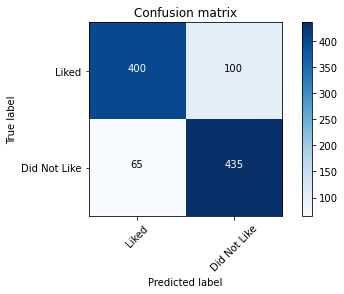

In [125]:
y = dataset.iloc[:, -1]

display_results(y, pred)

In [126]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 1500)

processed_reviews = pos_reviews_processed + neg_reviews_processed
final_reviews = []

for review in processed_reviews:
    final_reviews.append(" ".join(review))
    
final_reviews

['wow loved place',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'fry great',
 'great touch',
 'service prompt',
 'tried cape cod ravoli chicken cranberry mmmm',
 'highly recommended',
 'food amazing',
 'service also cute',
 'could care le interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'hole wall great mexican street taco friendly staff',
 'also combo like burger fry beer 23 decent deal',
 'found place accident could not happier',
 'overall like place lot',
 'redeeming quality restaurant inexpensive',
 'ample portion good price',
 'first visit hiro delight',
 'shrimp tender moist',
 'positive note server attentive provided great service',
 'thing like prime rib dessert section',
 'burger good beef cooked right',
 'want sandwich go firehouse',
 'side greek salad greek dressing tasty pita hummus refreshing',
 'ordered duck rare pink tender inside nice char outside',
 'came running u realized husband left 

In [127]:
X = cv.fit_transform(final_reviews).toarray()
y = [1] * 500 + [0] * 500

X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [128]:
X.shape

(1000, 1500)

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Testing Results: 

Accuracy = 0.785


Classification Report:

               precision    recall  f1-score   support

       Liked       0.78      0.80      0.79       102
Did Not Like       0.79      0.77      0.78        98

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



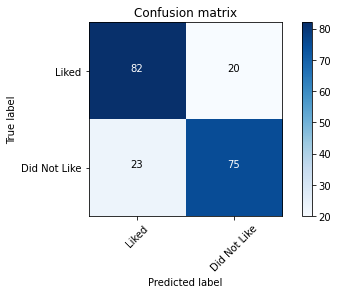

In [130]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB(alpha=0.8)
nb.fit(X_train, y_train)

y_pred_nb_test = nb.predict(X_test)

print("Testing Results: \n")
display_results(y_test, y_pred_nb_test)


Training Results: 


Accuracy = 0.9525


Classification Report:

               precision    recall  f1-score   support

       Liked       0.96      0.94      0.95       398
Did Not Like       0.95      0.96      0.95       402

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



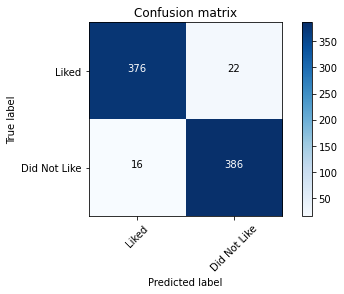

In [131]:
y_pred_nb_train = nb.predict(X_train)

print("\nTraining Results: \n\n")
display_results(y_train, y_pred_nb_train)

Testing Results: 

Accuracy = 0.76


Classification Report:

               precision    recall  f1-score   support

       Liked       0.76      0.76      0.76       102
Did Not Like       0.76      0.76      0.76        98

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



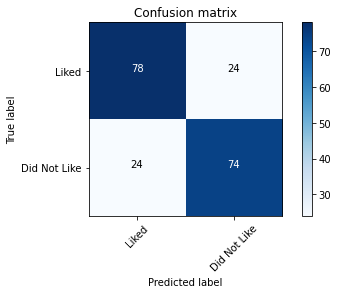

In [132]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       max_features='log2', min_samples_leaf=2,
                       n_estimators=500, random_state=0)

rf.fit(X_train, y_train)

y_pred_rf_test = rf.predict(X_test)

print("Testing Results: \n")
display_results(y_test, y_pred_rf_test)


Training Results: 


Accuracy = 0.895


Classification Report:

               precision    recall  f1-score   support

       Liked       0.92      0.87      0.89       398
Did Not Like       0.88      0.92      0.90       402

    accuracy                           0.90       800
   macro avg       0.90      0.89      0.89       800
weighted avg       0.90      0.90      0.89       800



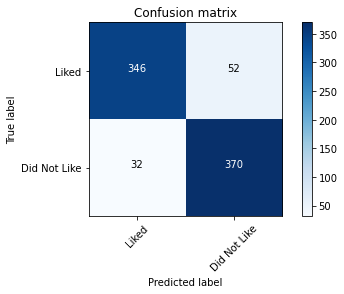

In [133]:
y_pred_rf_train = rf.predict(X_train)

print("\nTraining Results: \n\n")
display_results(y_train, y_pred_rf_train)

In [118]:
inp = input("Enter Review: ")

inp = [inp]
inp_processed = process_reviews(inp)
inp_words = get_words(inp_processed)
inp_final = [" ".join(inp_processed[0])]

overall_pred = [0, 0]

test = cv.transform(inp_final).toarray()

print("\nPoint Based Prediction:\n")

pred_p = get_score(inp_words)

if pred_p >= 0:
    overall_pred[1] = overall_pred[1] + 1
else:
    overall_pred[0] = overall_pred[0] + 1

print("\nNaive Bayes Prediction:")

pred_nb = nb.predict(test)

if pred_nb == 1:
    print("Liked")
    overall_pred[1] = overall_pred[1] + 1
else:
    print("Did Not Like")
    overall_pred[0] = overall_pred[0] + 1
    
    
print("\nRandom Forest Prediction:")

pred_rf = rf.predict(test)

if pred_rf == 1:
    print("Liked")
    overall_pred[1] = overall_pred[1] + 1
else:
    print("Did Not Like")
    overall_pred[0] = overall_pred[0] + 1
    

print("\n\nOverall Prediction:")
if np.argmax(overall_pred) == 1:
    print("Liked")
else:
    print("Did Not Like")

Enter Review: loved the food but service was not good

Point Based Prediction:

loved -> 5.0
service -> 3.5
not good -> -5.0

Score = 1.1666666666666667
Liked

-----------------------


Naive Bayes Prediction:
Liked

Random Forest Prediction:
Liked


Overall Prediction:
Liked
